In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importando os dados 

fonte: https://covid.saude.gov.br/

In [ ]:
data = pd.read_excel('/content/gdrive/My Drive/data/HIST_PAINEL_COVIDBR_22set2020.xlsx')

# Visualização dos dados 
print(data.shape)
data.head(10)

(1011748, 17)


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
5,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-01,10,210147125.0,2,0,0,0,NaN,NaN,NaN
6,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-02,10,210147125.0,2,0,0,0,NaN,NaN,NaN
7,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-03,10,210147125.0,2,0,0,0,NaN,NaN,NaN
8,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-04,10,210147125.0,3,1,0,0,NaN,NaN,NaN
9,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-03-05,10,210147125.0,7,4,0,0,NaN,NaN,NaN


In [ ]:
data.regiao.value_counts()

Nordeste        326439
Sudeste         301804
Sul             215013
Centro-Oeste     85264
Norte            83017
Brasil             211
Name: regiao, dtype: int64

## Separando os dados gerais brasileiros

In [ ]:
br = data.loc[data.regiao == "Brasil"]

In [ ]:
br 

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-18,38,210147125.0,4495183,39797,135793,858,3789139.0,570251.0,NaN
207,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-19,38,210147125.0,4528240,33057,136532,739,3820095.0,571613.0,NaN
208,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-20,39,210147125.0,4544629,16389,136895,363,3851227.0,556507.0,NaN
209,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-09-21,39,210147125.0,4558068,13439,137272,377,3887199.0,533597.0,NaN


### Casos Acumulados

Text(0, 0.5, 'Qtd Casos')

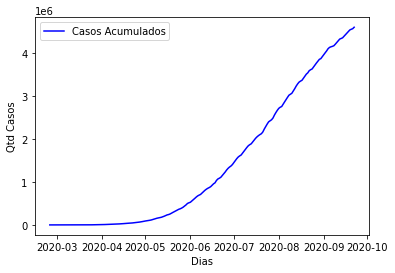

In [ ]:

plt.plot(br.data, br.casosAcumulado, 'b-', label='Casos Acumulados')
# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Dias')
plt.ylabel('Qtd Casos')

### Novos Casos

Text(0, 0.5, 'Qtd Casos')

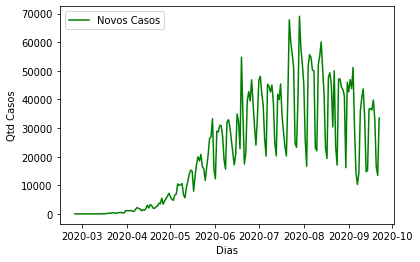

In [ ]:

plt.plot(br.data, br.casosNovos, 'g-', label='Novos Casos')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Dias')
plt.ylabel('Qtd Casos')

# Recife

In [ ]:
pe = data.loc[data.estado == "PE"]
pe = pe.loc[pe.municipio == "Recife"]

In [ ]:
pe.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
294808,Nordeste,PE,Recife,26,261160.0,26010.0,RECIFE,2020-03-27,13,1645727.0,0,0,0,0,NaN,NaN,1.0
294809,Nordeste,PE,Recife,26,261160.0,26010.0,RECIFE,2020-03-28,13,1645727.0,46,46,4,4,NaN,NaN,1.0
294810,Nordeste,PE,Recife,26,261160.0,26010.0,RECIFE,2020-03-29,14,1645727.0,50,4,4,0,NaN,NaN,1.0
294811,Nordeste,PE,Recife,26,261160.0,26010.0,RECIFE,2020-03-30,14,1645727.0,53,3,4,0,NaN,NaN,1.0
294812,Nordeste,PE,Recife,26,261160.0,26010.0,RECIFE,2020-03-31,14,1645727.0,1,-52,4,0,NaN,NaN,1.0


Text(0, 0.5, 'Qtd Casos')

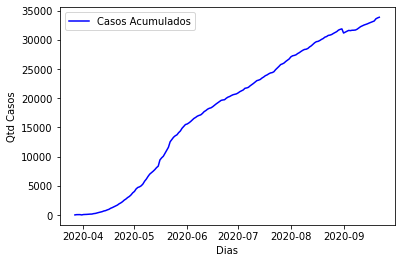

In [ ]:

plt.plot(pe.data, pe.casosAcumulado, 'b-', label='Casos Acumulados')
# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Dias')
plt.ylabel('Qtd Casos')

Text(0, 0.5, 'Qtd Casos')

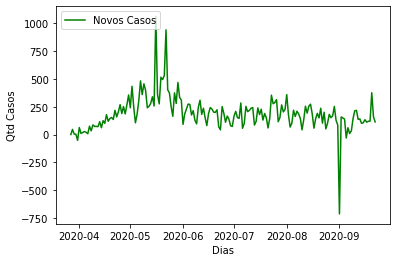

In [ ]:
# Plot with differently-colored markers.
#plt.plot(br.casosAcumulado, 'b-', label='Casos Acumulados')
plt.plot(pe.data, pe.casosNovos, 'g-', label='Novos Casos')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Dias')
plt.ylabel('Qtd Casos')

## João Pessoa

In [ ]:
pb = data.loc[data.estado == "PB"]
pb = pb.loc[pb.municipio == "João Pessoa"]

Text(0, 0.5, 'Qtd Casos')

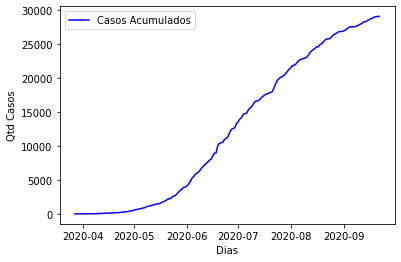

In [ ]:

plt.plot(pb.data, pb.casosAcumulado, 'b-', label='Casos Acumulados')
# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Dias')
plt.ylabel('Qtd Casos')

Text(0, 0.5, 'Qtd Casos')

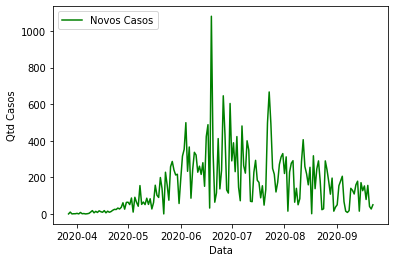

In [ ]:
# Plot with differently-colored markers.
#plt.plot(pb.data, pb.casosAcumulado, 'b-', label='Casos Acumulados')
plt.plot(pb.data, pb.casosNovos, 'g-', label='Novos Casos')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Qtd Casos')

In [ ]:
br.to_csv("/content/gdrive/My Drive/data/covid_br.csv", sep=";", index= False)
pb.to_csv("/content/gdrive/My Drive/data/covid_jp.csv", sep=";", index= False)

In [ ]:
pb = data.loc[data.estado == "PB"]
pb = pb.loc[pb.municipio == "Campina Grande"]

Text(0, 0.5, 'Qtd Casos')

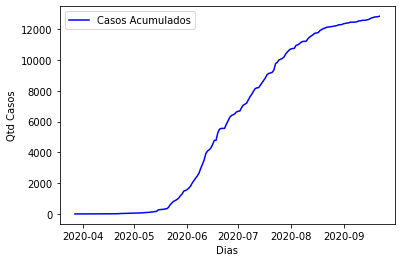

In [ ]:

plt.plot(pb.data, pb.casosAcumulado, 'b-', label='Casos Acumulados')
# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Dias')
plt.ylabel('Qtd Casos')

Text(0, 0.5, 'Qtd Casos')

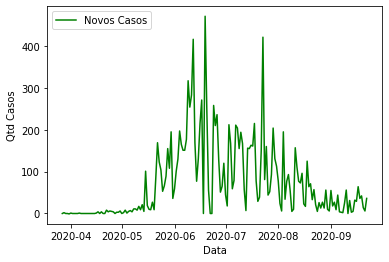

In [ ]:
# Plot with differently-colored markers.
#plt.plot(br.casosAcumulado, 'b-', label='Casos Acumulados')
plt.plot(pb.data, pb.casosNovos, 'g-', label='Novos Casos')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Qtd Casos')

In [ ]:
pb.to_csv("/content/gdrive/My Drive/data/covid_cg.csv", sep=";", index= False)